In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('sample_superstore.xlsx')

In [4]:
df.to_csv('super_store.csv', index=False)

In [5]:
# Check null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Find duplicates
df.duplicated().sum()

0

In [7]:
# Create profit margin(%) column
df['profit_margin'] = (df['Profit']/df['Sales'])*100

In [8]:
df.describe(include="all")

C:\Users\jigar\AppData\Local\Temp\ipykernel_15948\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")
C:\Users\jigar\AppData\Local\Temp\ipykernel_15948\1985922364.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,profit_margin
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,1237,1334,4,793,793,3,1,531,...,4,1862,3,17,1850,NaN,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,2016-09-05 00:00:00,2015-12-16 00:00:00,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5968,37,37,5191,9994,915,...,3203,19,6026,1523,48,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896,12.031393
std,2885.163629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108,46.675435
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,-275.000000
25%,2499.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750,7.500000


In [135]:
df['year'] = pd.DatetimeIndex(df['Order Date']).year.astype(str)
df['month'] = pd.DatetimeIndex(df['Order Date']).month

df['date_diff'] = (df['Ship Date']-df['Order Date'])/np.timedelta64(1, 'D')

years, counts_y = np.unique(df['year'].to_numpy(),return_counts=True)
months, counts_m= np.unique(df['month'].to_numpy(),return_counts=True)

import calendar
df['Month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

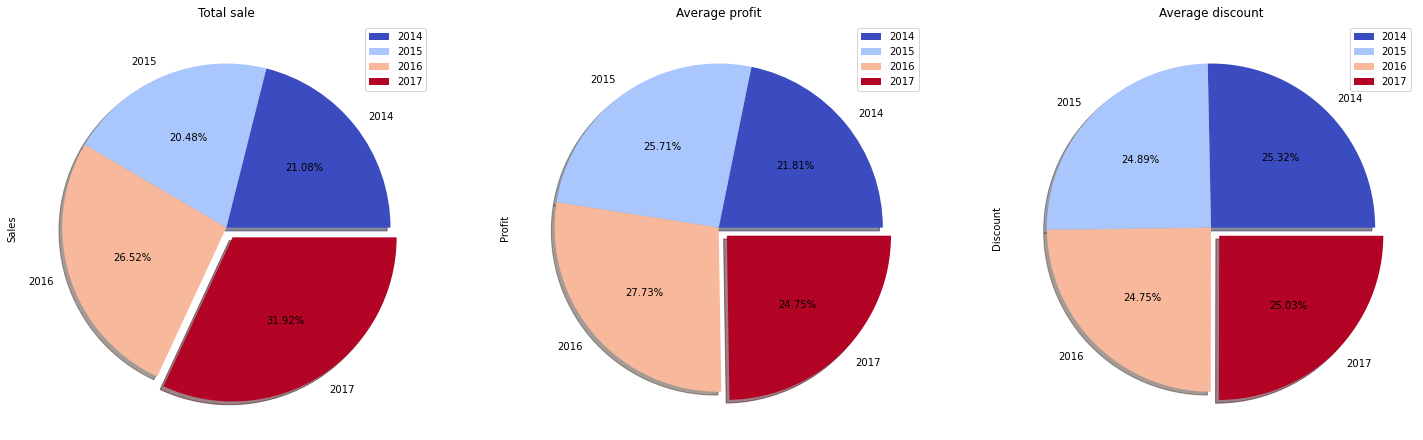

In [254]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,22))

df.groupby(['year']).sum().plot(kind='pie', y='Sales', autopct='%1.2f%%', title='Total sale', ax=ax[0],shadow=True, explode=[0.0, 0.0, 0.0, 0.07],cmap='coolwarm')
df.groupby(['year']).mean().plot(kind='pie', y='Profit', autopct='%1.2f%%', title='Average profit', ax=ax[1] ,shadow=True, explode=[0.0, 0.0, 0.0, 0.07],cmap='coolwarm')
df.groupby(['year']).mean().plot(kind='pie', y='Discount', autopct='%1.2f%%', title='Average discount', ax=ax[2] ,shadow=True, explode=[0.0, 0.0, 0.0, 0.07],cmap='coolwarm')
plt.savefig('pie_plot.png')

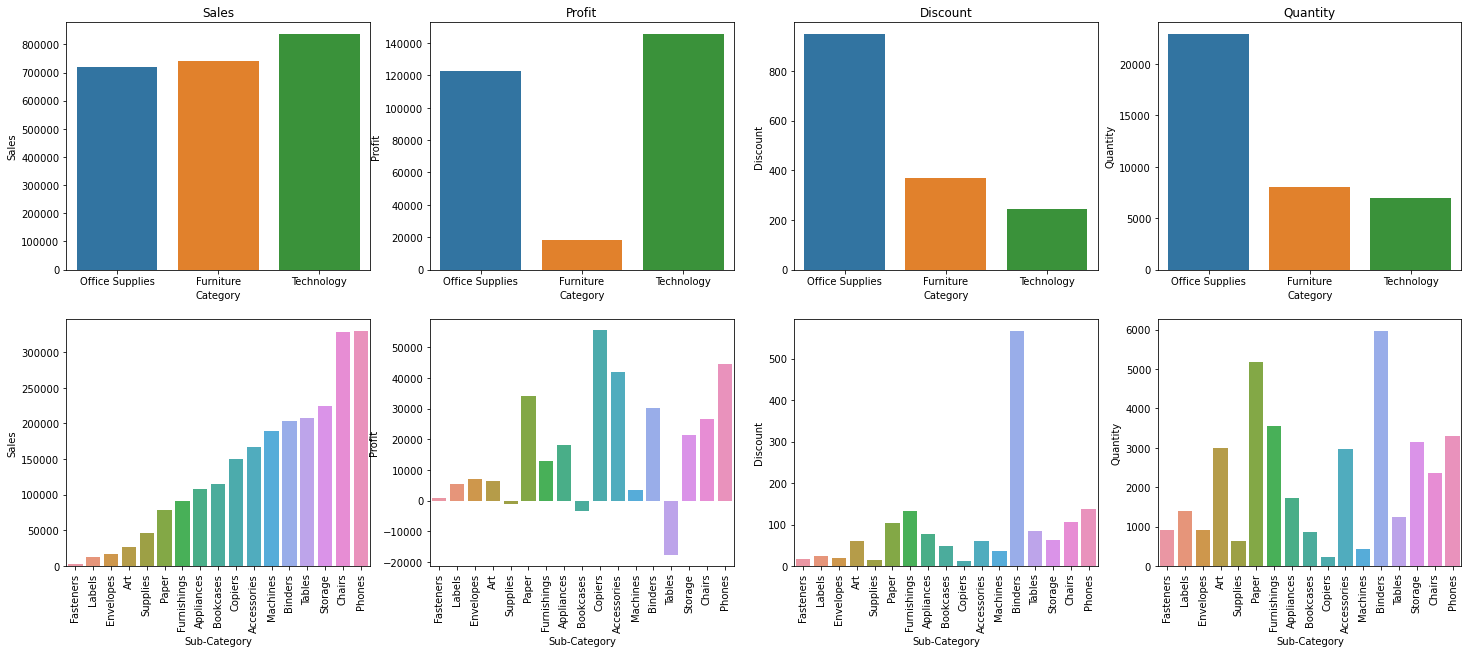

In [255]:
df_cat = pd.DataFrame(df.groupby(['Category'])[['Sales', 'Profit', 'Discount', 'Quantity']].sum()).sort_values('Sales')
df_scat = pd.DataFrame(df.groupby(['Sub-Category'])[['Sales', 'Profit', 'Discount', 'Quantity']].sum()).sort_values('Sales')

fid, ax = plt.subplots(2,4,figsize=(25,10))
p1=sns.barplot(x=df_cat.index,y=df_cat.Sales,data=df_cat,ax=ax[0,0])
p2=sns.barplot(x=df_cat.index,y=df_cat.Profit,data=df_cat,ax=ax[0,1])
p2_1=sns.barplot(x=df_cat.index,y=df_cat.Discount,data=df_cat,ax=ax[0,2])
p3=sns.barplot(x=df_cat.index,y=df_cat.Quantity,data=df_cat,ax=ax[0,3])

p4=sns.barplot(x=df_scat.index,y=df_scat.Sales,data=df_scat,ax=ax[1,0])
p5=sns.barplot(x=df_scat.index,y=df_scat.Profit,data=df_scat,ax=ax[1,1])
p5_1=sns.barplot(x=df_scat.index,y=df_scat.Discount,data=df_scat,ax=ax[1,2])
p6=sns.barplot(x=df_scat.index,y=df_scat.Quantity,data=df_scat,ax=ax[1,3])

# Set titles
p1.set(title = 'Sales')
p2.set(title = 'Profit')
p2_1.set(title = 'Discount')
p3.set(title = 'Quantity')

p4.set_xticklabels(p4.get_xticklabels(),rotation = "vertical", size = 10)
p5.set_xticklabels(p5.get_xticklabels(),rotation = "vertical", size = 10)
p5_1.set_xticklabels(p5_1.get_xticklabels(),rotation = "vertical", size = 10)
p6.set_xticklabels(p6.get_xticklabels(),rotation = "vertical", size = 10)

plt.savefig('bar_plot.png')

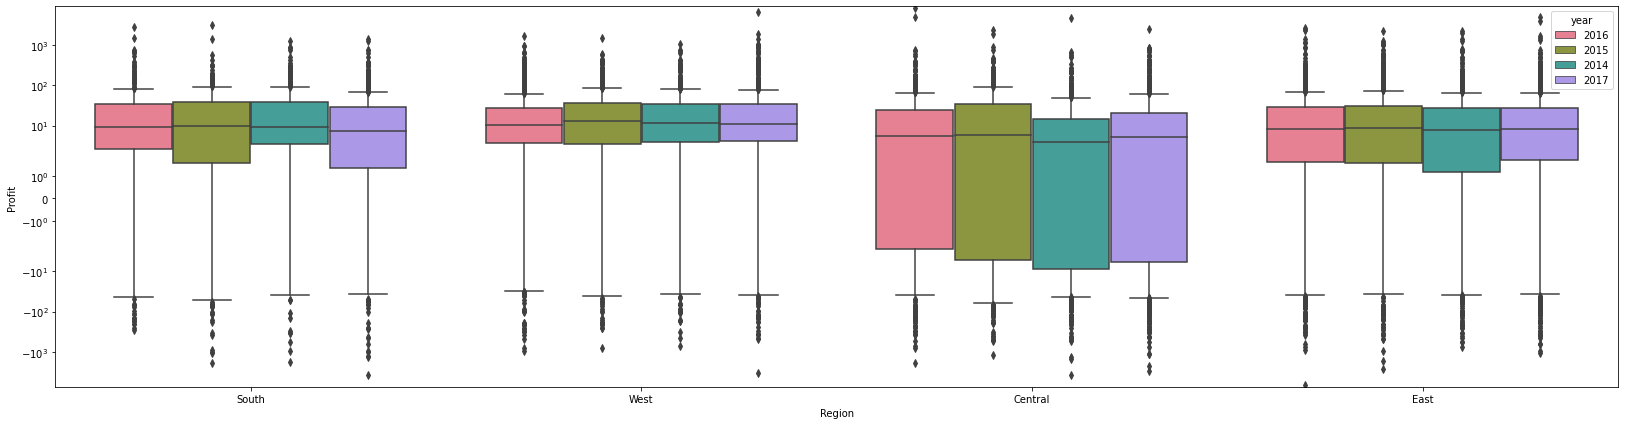

In [256]:
# Which region is the most beneficial
import seaborn as sns
fig, ax = plt.subplots(figsize=(28,7))
sns.boxplot(x = df['Region'],
            y = df['Profit'],
            hue = df['year'],
            palette = 'husl',
            ax=ax)
ax.set_yscale('symlog')
plt.savefig('anom_plot.png')

In [257]:
# Top selling sub-category and customer segment
sub_cat_q = pd.DataFrame(df.groupby(['Sub-Category'])[['Quantity']].sum().sort_values('Quantity',ascending=False))
seg_df = pd.DataFrame(df.groupby(['Segment'])[['Profit']].sum())
state = pd.DataFrame(df.groupby(['State'])[['Profit']].sum().sort_values('Profit',ascending=False))[:10]
city = pd.DataFrame(df.groupby(['City'])[['Profit']].sum().sort_values('Profit',ascending=False))[:10]

In [258]:
city

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908
Lafayette,10018.3876
Jackson,7581.6828
Atlanta,6993.6629
Minneapolis,6824.5846


C:\Users\jigar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jigar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jigar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\jigar\anacond

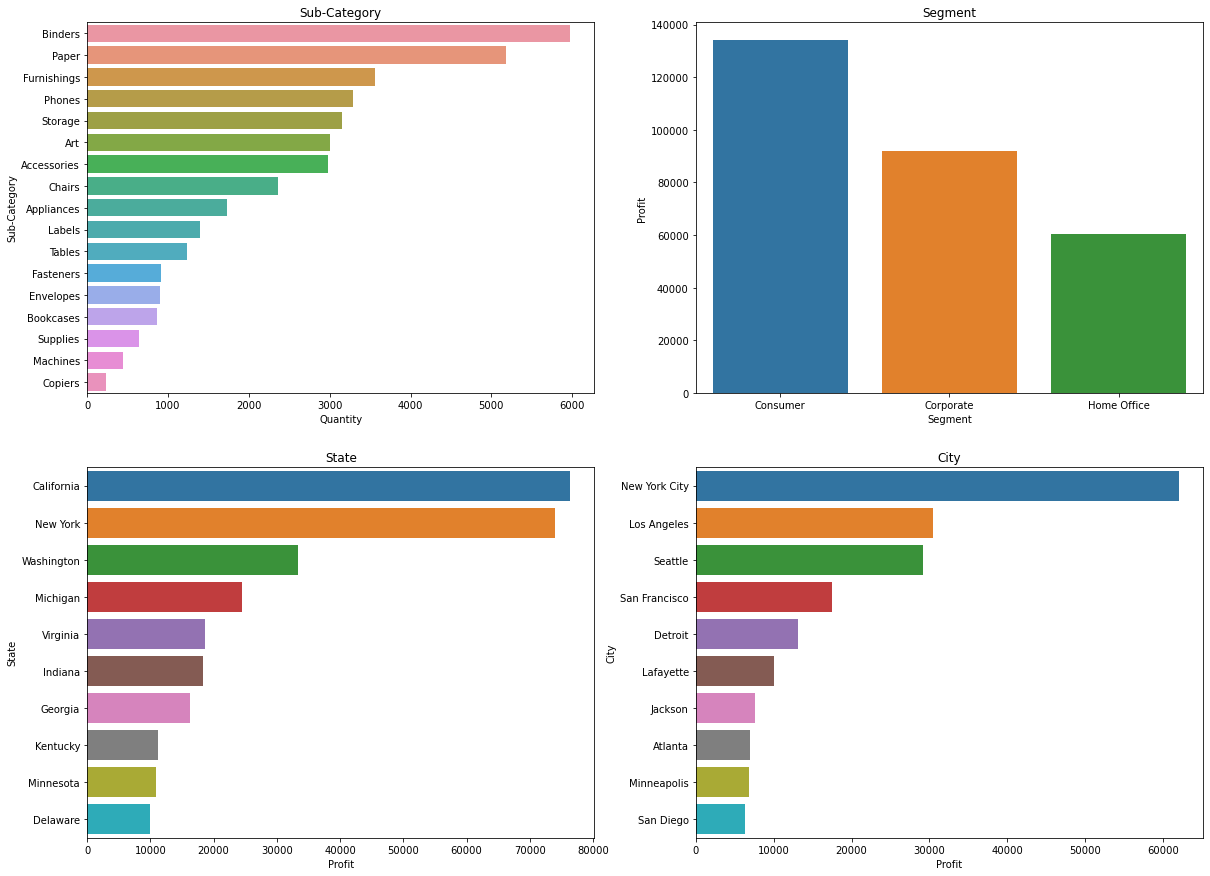

In [259]:
fig, ax = plt.subplots(2,2,figsize=(20,15))
p1=sns.barplot(sub_cat_q.Quantity,sub_cat_q.index,ax=ax[0,0])
p2=sns.barplot(seg_df.index,seg_df.Profit,ax=ax[0,1])
p3=sns.barplot(state.Profit,state.index,ax=ax[1,0])
p4=sns.barplot(city.Profit,city.index,ax=ax[1,1])

# Set titles
p1.set(title = 'Sub-Category')
p2.set(title = 'Segment')
p3.set(title = 'State')
p4.set(title = 'City')
plt.savefig('sub_cat_city.png')

In [260]:
#df1 = df[['Category','Profit','Month','year']]
mon_list=[8,9,10,11]
df1 = df[df['month'].isin(mon_list)]
df1['idx'] = df1.groupby(['Month', 'year']).cumcount() + 1
df1['date_idx'] = 'date_' + df1.idx.astype(str)
date = df1.pivot_table(index=['Month', 'year'], columns='Sub-Category', values='Sales', aggfunc='first')
cname = df1.pivot_table(index=['Month', 'year'], columns='Product ID', values='Sales', aggfunc='first')
print (date[:4])

Sub-Category  Accessories  Appliances    Art  Binders  Bookcases   Chairs  \
Month year                                                                  
Aug   2014        176.800       2.600  8.560   22.720    638.820  340.144   
      2015        247.800     105.960  2.200    2.724   1552.831  544.008   
      2016         95.976     122.328  5.472    1.788    241.960  786.744   
      2017         71.980      97.840  9.728  107.424    145.740  866.400   

Sub-Category   Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
Month year                                                                    
Aug   2014    1199.976      4.720     40.096       327.76   20.88       NaN   
      2015    2799.960        NaN     10.650        47.04    3.08   239.976   
      2016         NaN    134.288     10.230       109.80  100.24   837.600   
      2017     879.984     15.280     35.000        40.48   47.36  1439.982   

Sub-Category    Paper   Phones  Storage  Supplies    Tables  


C:\Users\jigar\AppData\Local\Temp\ipykernel_15948\3632573430.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['idx'] = df1.groupby(['Month', 'year']).cumcount() + 1
C:\Users\jigar\AppData\Local\Temp\ipykernel_15948\3632573430.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['date_idx'] = 'date_' + df1.idx.astype(str)


In [261]:
date.columns

Index(['Accessories', 'Appliances', 'Art', 'Binders', 'Bookcases', 'Chairs',
       'Copiers', 'Envelopes', 'Fasteners', 'Furnishings', 'Labels',
       'Machines', 'Paper', 'Phones', 'Storage', 'Supplies', 'Tables'],
      dtype='object', name='Sub-Category')

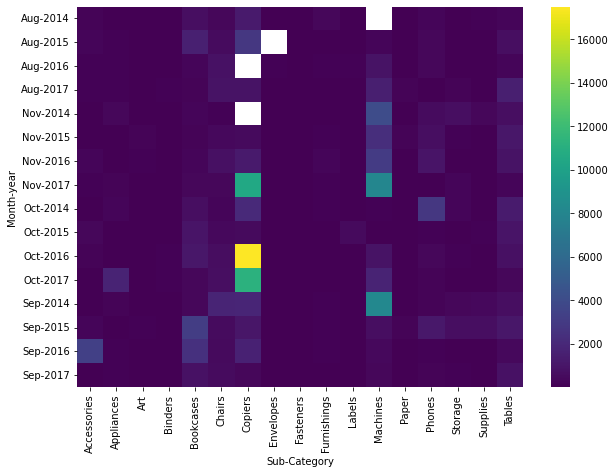

In [262]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(date,cmap='viridis')
plt.savefig('date_mon_sub_cat_prof.png')

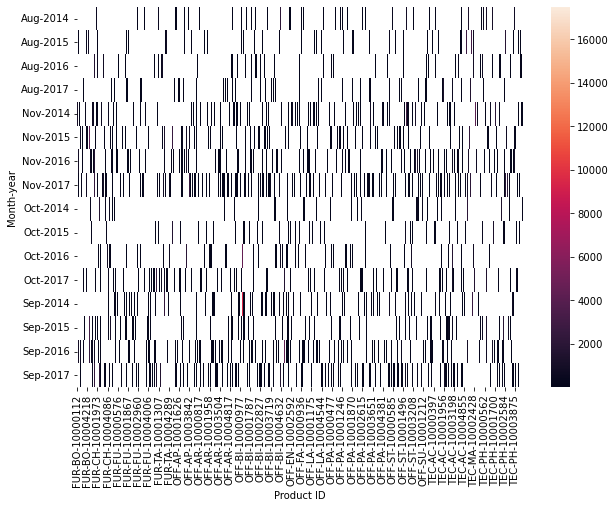

In [251]:
fig, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(cname)

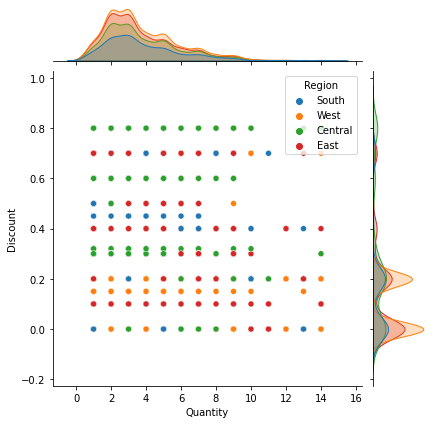

In [100]:
sns.jointplot(data=df, x="Quantity", y="Discount", hue="Region")
#plt.xscale('symlog')
#plt.yscale('symlog')

In [60]:
fl = df_16.pivot('Month','Sub-Category','Sales')
ax = sns.heatmap(f1)

ValueError: Index contains duplicate entries, cannot reshape

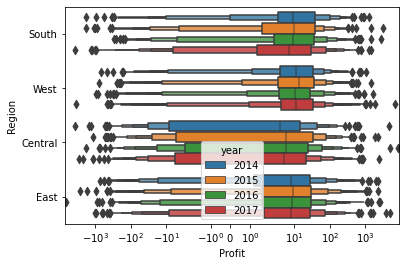

In [54]:
sns.boxenplot(data=df, x="Profit", y="Region",hue='year')
plt.xscale('symlog')

In [69]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'profit_margin', 'year', 'month', 'date_diff', 'Month'],
      dtype='object')

In [34]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25,22))

df.groupby(['year']).sum().plot(kind='pie', y='Sales', autopct='%1.2f%%', title='Total sale', ax=ax[0,0],shadow=True, explode=[0.0, 0.0, 0.0, 0.07],cmap='coolwarm')
df.groupby(['year']).mean().plot(kind='pie', y='Profit', autopct='%1.2f%%', title='Average profit', ax=ax[0,1] ,shadow=True, explode=[0.0, 0.0, 0.0, 0.07],cmap='coolwarm')
df.groupby(['year']).mean().plot(kind='pie', y='Discount', autopct='%1.2f%%', title='Average discount', ax=ax[0,2] ,shadow=True, explode=[0.0, 0.0, 0.0, 0.07],cmap='coolwarm')

pd.crosstab(df['Region'],df['Sales']).plot(kind='bar', ax=ax[1,0], title='Region', cmap='viridis')
pd.crosstab(df['Region'],df['date_diff']).plot(kind='bar', ax=ax[1,1], title='Date difference', cmap='viridis')
pd.crosstab(df['Region'],df['Ship Mode']).plot(kind='bar', ax=ax[1,2], title='Ship Mode', cmap='viridis')

pd.crosstab(df['year'],df['Category']).plot(kind='bar', ax=ax[2,0], title='Category', cmap='viridis')
pd.crosstab(df['year'],df['Month']).plot(kind='bar', ax=ax[2,1], title='Months', cmap='viridis')
pd.crosstab(df['year'],df['date_diff']).plot(kind='bar', ax=ax[2,2], title='Date diff', cmap='viridis')

<AxesSubplot:title={'center':'Date diff'}, xlabel='year'>

ValueError: Image size of 1441x92665 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1800x1584 with 9 Axes>

<AxesSubplot:title={'center':'Total profit 2017'}, ylabel='Profit'>

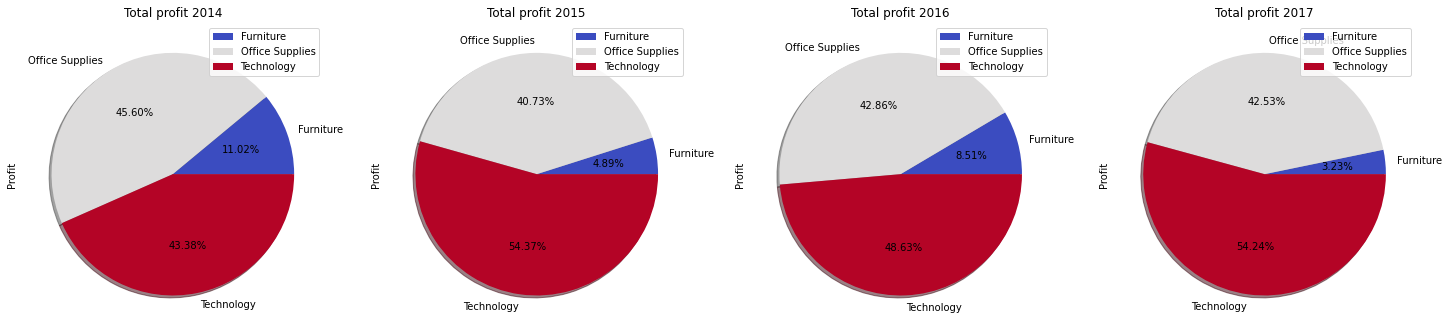

In [165]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(25,22))

df_14.groupby(['Category']).sum().plot(kind='pie', y='Profit', autopct='%1.2f%%', title='Total profit 2014', ax=ax[0],shadow=True, explode=[0.0, 0.0, 0.0],cmap='coolwarm')
df_15.groupby(['Category']).sum().plot(kind='pie', y='Profit', autopct='%1.2f%%', title='Total profit 2015', ax=ax[1] ,shadow=True, explode=[0.0, 0.0, 0.0],cmap='coolwarm')
df_16.groupby(['Category']).sum().plot(kind='pie', y='Profit', autopct='%1.2f%%', title='Total profit 2016', ax=ax[2] ,shadow=True, explode=[0.0, 0.0, 0.0],cmap='coolwarm')
df_17.groupby(['Category']).sum().plot(kind='pie', y='Profit', autopct='%1.2f%%', title='Total profit 2017', ax=ax[3] ,shadow=True, explode=[0.0, 0.0, 0.0],cmap='coolwarm')

<AxesSubplot:title={'center':'2017'}, xlabel='Month'>

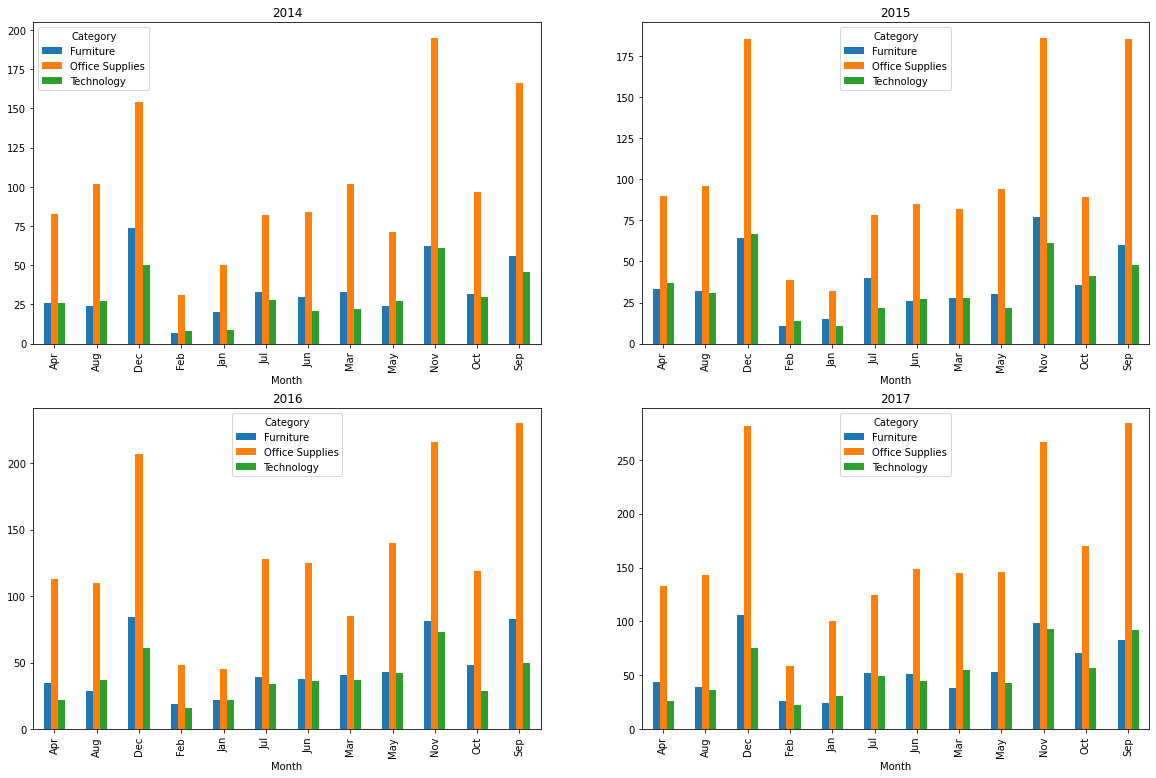

In [15]:
df_14 = df[df['year']==2014]
df_15 = df[df['year']==2015]
df_16 = df[df['year']==2016]
df_17 = df[df['year']==2017]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,13))
pd.crosstab(df_14['Month'], df_14['Category']).plot(kind='bar', ax=ax[0,0], title='2014')
pd.crosstab(df_15['Month'], df_15['Category']).plot(kind='bar', ax=ax[0,1], title='2015')
pd.crosstab(df_16['Month'], df_16['Category']).plot(kind='bar', ax=ax[1,0], title='2016')
pd.crosstab(df_17['Month'], df_17['Category']).plot(kind='bar', ax=ax[1,1], title='2017')

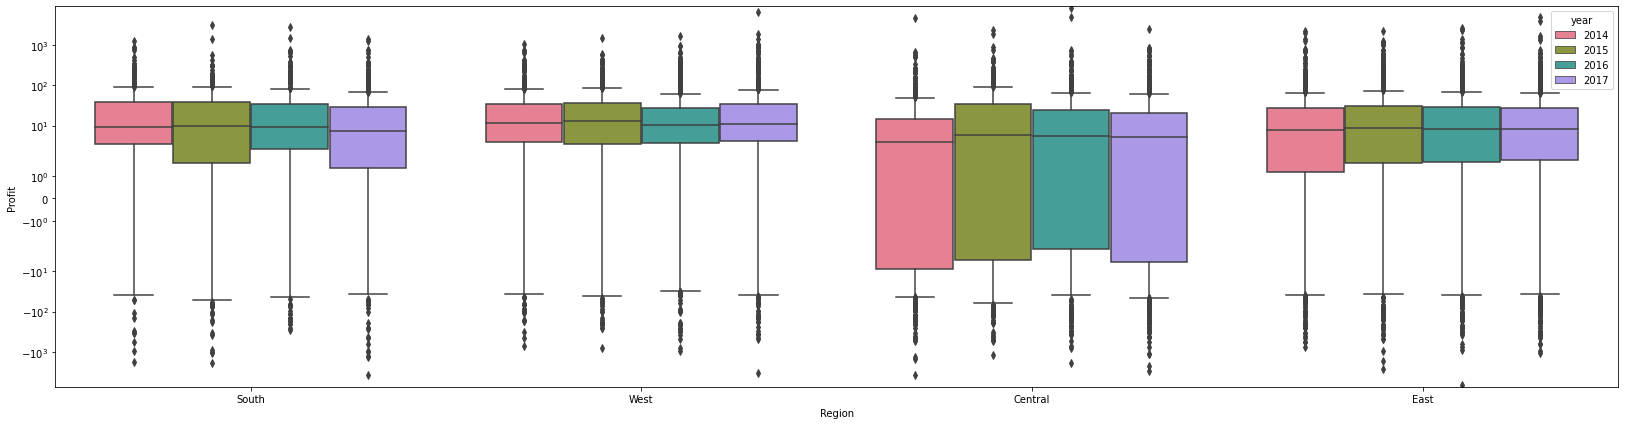

In [135]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'year',
       'month', 'date_diff', 'Month'],
      dtype='object')

In [136]:
def year_month_hist(df):
    fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(15,5))
    fig.suptitle('Popularity determination')

    ax1.hist(df['year'].to_numpy(),bins=10)
    ax2.set_xlabel('year')
    ax1.set_ylabel('Order counts')

    ax2.hist(df['Month'].to_numpy(),bins=12)
    ax2.set_xlabel('Months')
    ax2.set_ylabel('Order counts')

    plt.show()

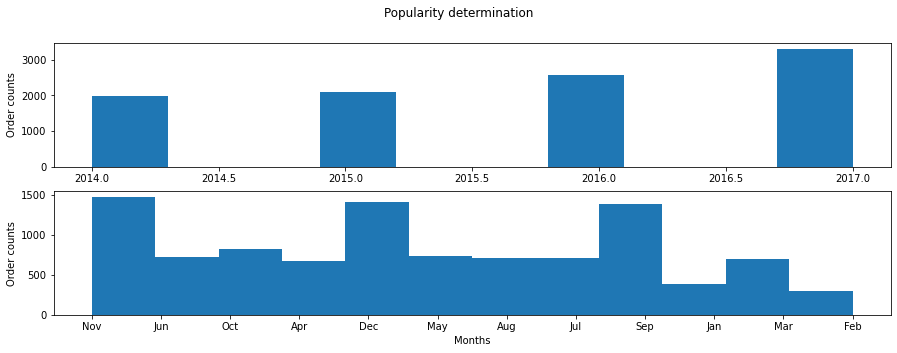

In [137]:
year_month_hist(df)

The popularity of Superstore is increasing by year, and large number of items purchased during October and December

In [138]:
# Get overall profit of company
avg_prof = round(df['Profit'].mean(),3)
if avg_prof<0:
    print("The firm is in loss with average loss, {} units, from 2014 to 2017".format(avg_prof))
elif avg_prof>0:
    print("The firm is in benefit with average profit, {} units, from 2014 to 2017".format(avg_prof))

The firm is in benefit with average profit, 28.657 units, from 2014 to 2017


In [139]:
# Find out yearwise profit and sales
def avg_quantity_year(df, years, col_name):
    avg = [round(df[df['year']==i][col_name].mean(),3) for i in years]
    std = [round(df[df['year']==i][col_name].std(),3) for i in years]
    return avg,std
def tot_quantity_year(df, years, col_name):
    tot = [round(df[df['year']==i][col_name].sum(),3) for i in years]
    return tot


# Find out monthwise profit and sales
def avg_quantity_months(df, months, col_name):
    avg = [round(df[df['month']==i][col_name].mean(),3) for i in months]
    std = [round(df[df['month']==i][col_name].std(),3) for i in months]
    return avg,std
def tot_quantity_months(df, months, col_name):
    tot = [round(df[df['month']==i][col_name].sum(),3) for i in months]
    return tot

In [140]:
def func():
    fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(15,7))
    profit_y_avg,profit_y_std = avg_quantity_year(df,years,'Profit')
    profit_y_tot = tot_quantity_year(df,years,'Profit')
    for i in years:
        df1 = df[df['year']==i]
        profit_m_avg,profit_m_std = avg_quantity_months(df1,months,'Profit')
        sales_m_avg,sales_m_std = avg_quantity_months(df1,months,'Sales')
        profit_m_tot = tot_quantity_months(df1,months,'Profit')
        sales_m_tot = tot_quantity_months(df1,months,'Sales')
        
        ax2.plot(months,profit_m_avg,label=i,marker='o')
        ax2.set_xlabel('Months')
        ax2.set_ylabel('Average monthly profit')
        ax2.legend()
        
    ax1.plot(profit_y_tot, profit_y_avg, marker='o')
    ax1.set_xlabel('Total annual profit')
    ax1.set_ylabel('Average annual profit')
    ax1.set_ylim(23,32)
    for i,txt in enumerate(years):
        ax1.annotate(txt,(profit_y_tot[i],profit_y_avg[i]-1))

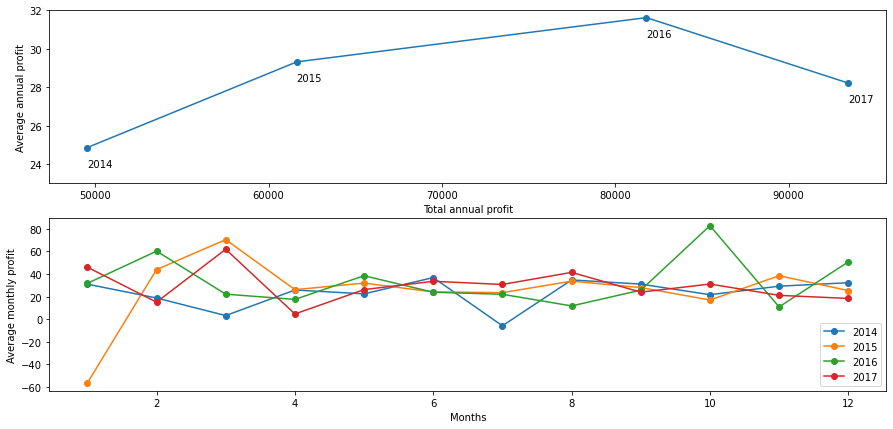

In [141]:
func()

In [142]:
# Conclusion
#1.) More sales during end of year
#2.) 2016 highest avg profit
#3.) 2016 0ctober has highest profit

# Follow-up task analysis of items sold during 2016 conpare to oct 2016

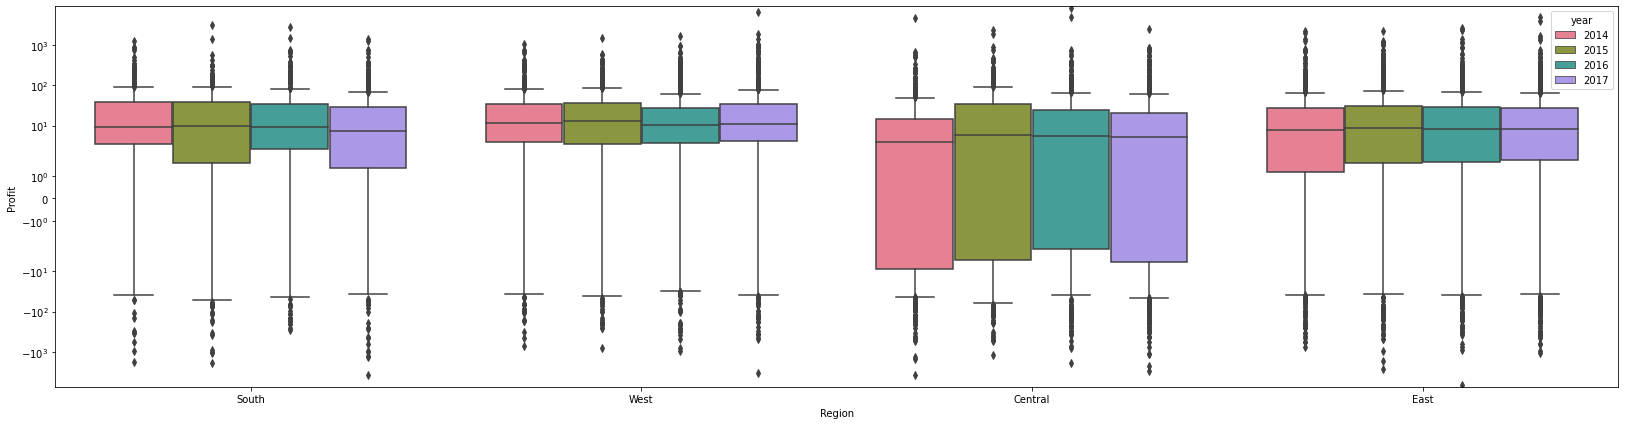

In [253]:
#fig,ax = plt.subplots(figsize=(28,7))
#plt.subplots(figsize=(12,8), dpi=300)
sns.displot(data=df, x="Discount", col="Region", kde=True,row='Product ID')
#plt.xscale('symlog')
#ax.set_xscale('log')

ValueError: Image size of 1440x670320 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 1440x670320 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1440x670320 with 7448 Axes>

(array([ 221.,  170., 1005.,  130.,   58.,  686.,  316.,   28.,  380.,
         441.,  105.,  259.,  353.,  275.,  343.,  100.,  129.,   34.,
         499.,   71.,   50.,  106.,  370.,  653.,  207.,  296.,   74.,
        1193.,  812.,  630.]),
 array([ 1040.        ,  4315.36666667,  7590.73333333, 10866.1       ,
        14141.46666667, 17416.83333333, 20692.2       , 23967.56666667,
        27242.93333333, 30518.3       , 33793.66666667, 37069.03333333,
        40344.4       , 43619.76666667, 46895.13333333, 50170.5       ,
        53445.86666667, 56721.23333333, 59996.6       , 63271.96666667,
        66547.33333333, 69822.7       , 73098.06666667, 76373.43333333,
        79648.8       , 82924.16666667, 86199.53333333, 89474.9       ,
        92750.26666667, 96025.63333333, 99301.        ]),
 <BarContainer object of 30 artists>)

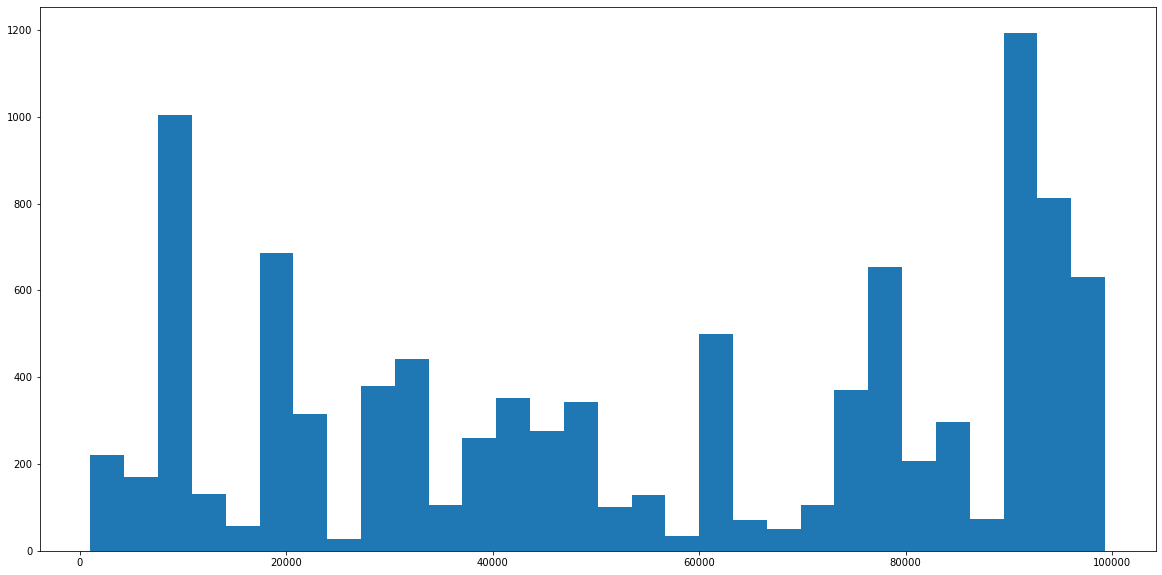

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
plt.hist(df["Postal Code"].to_numpy(),bins=30)

In [209]:
df['Postal Code']

0       42420
1       42420
2       90036
3       33311
4       33311
        ...  
9989    33180
9990    92627
9991    92627
9992    92627
9993    92683
Name: Postal Code, Length: 9994, dtype: int64

<BarContainer object of 3 artists>

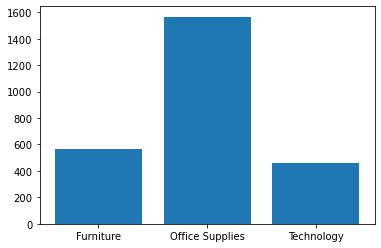

In [105]:
plt.bar(cat_v,cat_c)

In [143]:
def cat_months(df_16,cat):
    df_16_c = df_16[df['Category']==cat]
    avg_cat_m = [df_16_c[df_16_c['month']==m]['month'].value_counts() for m in months]#.to_dict()
    df_16_c['month'].value_counts().plot.bar()
    return avg_cat_m

C:\Users\jigar\AppData\Local\Temp\ipykernel_18468\3819225034.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_16_c = df_16[df['Category']==cat]
C:\Users\jigar\AppData\Local\Temp\ipykernel_18468\3819225034.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_16_c = df_16[df['Category']==cat]


[1    22
 Name: month, dtype: int64,
 2    19
 Name: month, dtype: int64,
 3    41
 Name: month, dtype: int64,
 4    35
 Name: month, dtype: int64,
 5    43
 Name: month, dtype: int64,
 6    38
 Name: month, dtype: int64,
 7    39
 Name: month, dtype: int64,
 8    29
 Name: month, dtype: int64,
 9    83
 Name: month, dtype: int64,
 10    48
 Name: month, dtype: int64,
 11    81
 Name: month, dtype: int64,
 12    84
 Name: month, dtype: int64]

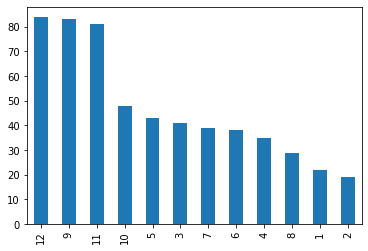

In [144]:
cat_months(df_16,cat_v[2])
cat_months(df_16,cat_v[0])

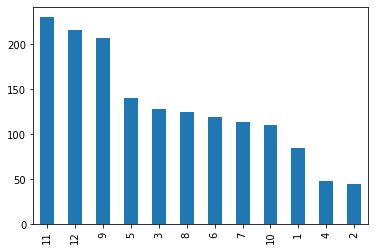

In [142]:
for i in cat_v:
    df_16_1 = df_16[df_16['Category']==i]
    df_16_1['month'].value_counts().plot.bar()

In [122]:
# # Get avg data
# profit_y_avg,profit_y_std = avg_quantity_year(df,years,'Profit')
# sales_y_avg,sales_y_std = avg_quantity_year(df,years,'Sales')

# profit_m_avg,profit_m_std = avg_quantity_months(df,months,'Profit')
# sales_m_avg,sales_m_std = avg_quantity_months(df,months,'Sales')

# # Get total data
# profit_y_tot = tot_quantity_year(df,years,'Profit')
# sales_y_tot = tot_quantity_year(df,years,'Sales')

# profit_m_tot = tot_quantity_months(df,months,'Profit')
# sales_m_tot = tot_quantity_months(df,months,'Sales')

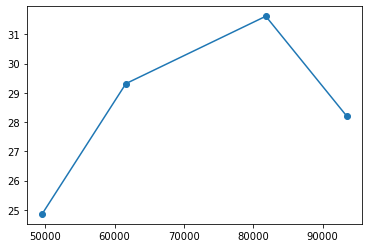

In [123]:
plt.plot(profit_y_tot, profit_y_avg, marker='o')

<BarContainer object of 12 artists>

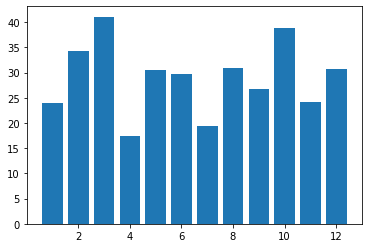

In [130]:
plt.bar(months,profit_m_avg)

<AxesSubplot:xlabel='year,Category'>

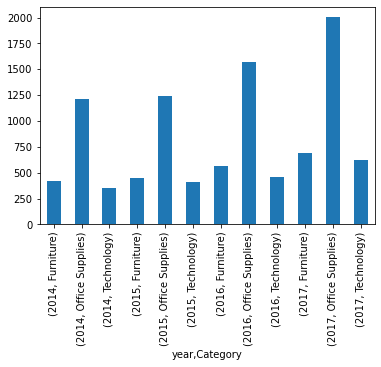

In [147]:
groups = df.groupby(['year','Category']).size()
groups.plot.bar()

<AxesSubplot:xlabel='year'>

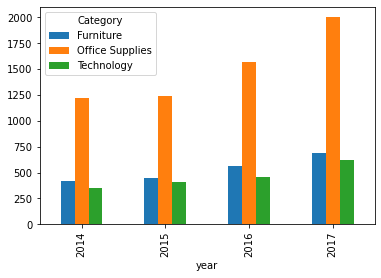